# Sylvie Fortier

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import math
from math import sqrt

import statsmodels as stats
from statsmodels.formula.api import ols
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
from statsmodels.tools.eval_measures import rmse

import scipy as sp
from scipy import stats
from scipy.stats import boxcox
from scipy.special import boxcox, inv_boxcox

from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# 1) Prep dataframe

In [2]:
# Entire dataframe
df_all = pd.read_excel('Assignment4_linear_regresion_data.xlsx', sheet_name=None)
df_all.keys()

dict_keys(['Set 1', 'Set 2', 'Set 3', 'Set 4', 'Set 5', 'Set 6'])

In [3]:
# Import data to create a DF for each independent variables
df = pd.ExcelFile(r'Assignment4_linear_regresion_data.xlsx')
df1 = pd.read_excel(df, sheet_name='Set 1')
df2 = pd.read_excel(df, sheet_name='Set 2')
df3 = pd.read_excel(df, sheet_name='Set 3')
df4 = pd.read_excel(df, sheet_name='Set 4')
df5 = pd.read_excel(df, sheet_name='Set 5')
df6 = pd.read_excel(df, sheet_name='Set 6')

In [4]:
# Look at Dtype
print(df1.info())
print(df2.info())
print(df3.info())
print(df4.info())
print(df5.info())
print(df6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       100 non-null    float64
 1   x       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       100 non-null    float64
 1   x       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       100 non-null    float64
 1   x       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Colu

**Note: all Dtype for all sets are GtG**

In [5]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)

(100, 2)
(100, 2)
(100, 2)
(100, 2)
(101, 2)
(101, 2)


**Note: There are 100 observations for df1, df2, df3, df4 and 101 observations for df5, df6**

In [6]:
# Check for missing values
print(df1.isnull().values.any())
print(df2.isnull().values.any())
print(df3.isnull().values.any())
print(df4.isnull().values.any())
print(df5.isnull().values.any())
print(df6.isnull().values.any())

False
False
False
False
False
False


**Note: There is no missing values in all sets so we are GtG**

In [7]:
#Check if there are duplicates
print(df1.duplicated().any())
print(df2.duplicated().any())
print(df3.duplicated().any())
print(df4.duplicated().any())
print(df5.duplicated().any())
print(df6.duplicated().any())

False
False
False
False
False
False


**Note: There is no duplicates in all sets so we are GtG**

**One hot encoding:** 

No need to create any dummy variables because all sets are continuous variables (not categorial variables).

# 2) Conduct exploratory analysis for the continuous variables

## a) Descriptive statistics

In [8]:
for set in df_all.keys():

    df = df_all[set]
    df.columns = df.columns.str.lower()
    
    print(set)
    print('mean: ', round(df.mean()[0], 1))
    print('std: ', round(df.std()[0], 1))
    print('median: ', round(df.median()[0], 1))
    print('min: ', round(df.min()[0], 1))
    print('max: ', round(df.max()[0], 1))

Set 1
mean:  29.2
std:  13.2
median:  27.6
min:  6.3
max:  50.9
Set 2
mean:  26.8
std:  15.6
median:  29.0
min:  -11.7
max:  63.9
Set 3
mean:  3853.8
std:  3042.5
median:  3190.6
min:  85.8
max:  13259.1
Set 4
mean:  661442.9
std:  1311668.3
median:  64031.7
min:  205.3
max:  8240777.3
Set 5
mean:  24.6
std:  15.1
median:  25.7
min:  -4.4
max:  52.8
Set 6
mean:  39.2
std:  31.4
median:  39.5
min:  -6.8
max:  252.8


## b) Plot boxplots

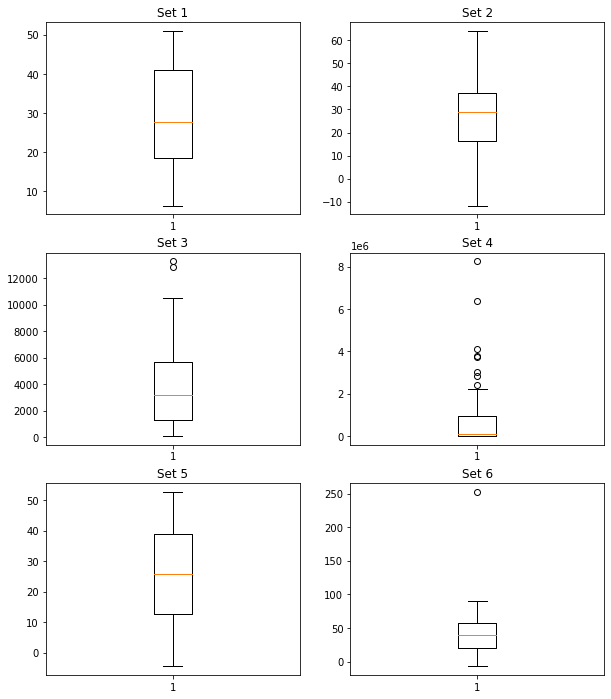

In [9]:
count=1
plt.subplots(figsize=(10, 12))

for set in df_all.keys():

    df = df_all[set]
    plt.subplot(3,2,count)
    plt.boxplot(df.y)
    plt.title(set)
    count+=1

plt.show()

**Note: potential outliers in set 3, set 4, set 6**

# 3) Check for linearity

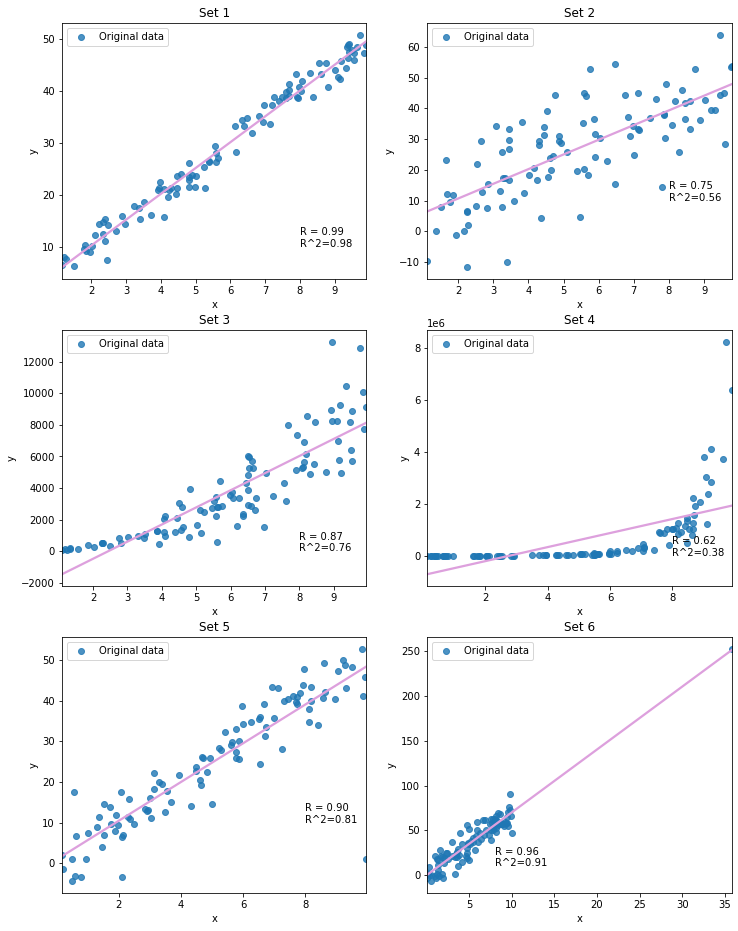

In [10]:
# Scatter plots with the original data

count=1
plt.subplots(figsize=(12, 16))

for set in df_all.keys():

    df = df_all[set]
    df.columns = df.columns.str.lower()
    
    plt.subplot(3,2,count)
    sns.regplot(x='x', y='y', data=df, label='Original data', ci=False, line_kws={'color':'plum'})
    count+=1
    
    # Add Pearson's values to the graph
    r, p = sp.stats.pearsonr(df.x, df.y)
    plt.annotate("R = {:.2f} \nR^2={:.2f}".format(r,r**2), (8, 10))

    plt.title(set)
    plt.legend(loc=2)
    
plt.show()    

**Notes:**
- **set 1, set 5, set 6 show strong positive linear correlations**
- **set 2 shows a weak positive linear correlation**
- **set 3 and set 4 show curvilinear correlations and should try to transform the original data to see if it would make them linear**

# 4) Transform the data

## a) Square root transformation of the dependent variables

In [11]:
df3['Y_sqrt'] = np.sqrt(df3.y)
df4['Y_sqrt'] = np.sqrt(df4.y)

## b) Log transformation of the dependent variables

In [12]:
df3['Y_log'] = np.log(df3.y)
df4['Y_log'] = np.log(df4.y)

## c) Box-Cox or Yeo-Johnson transformation

Box-Cox transformation is used to find the most suitable transformation based on the lambda.

    A lambda = 0 >>> log transformation
    A lambda = 0.5 >>> sqrt transformation

Note: boxcox requires the input data to be positive and it returns a tuple (value [0], lmbda [1]). For negative input values, use $stats.yeojohnson()$

In [13]:
df3['Y_bc'], lmbda1 = stats.boxcox(df3.y, lmbda=None)
df4['Y_bc'], lmbda2 = stats.boxcox(df4.y, lmbda=None)

print('The optimal lambda for df3 is %f and is not close to sqrt nor log transformation.' %lmbda1)
print('The optimal lambda for df4 is %f and is really close to log transformation.' %lmbda2)

The optimal lambda for df3 is 0.396340 and is not close to sqrt nor log transformation.
The optimal lambda for df4 is 0.041967 and is really close to log transformation.


## d) Choose the best transformations

### (i) Best for df3

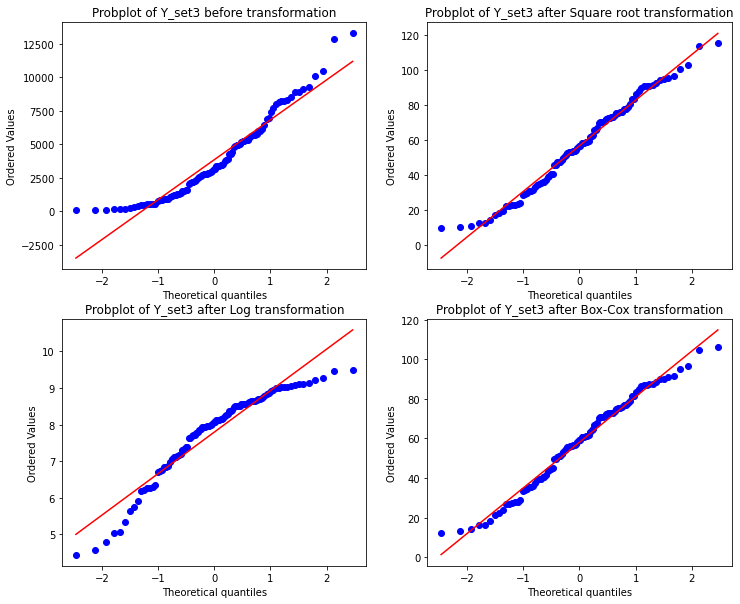

In [14]:
plt.figure(figsize=(12,10))

plt.subplot(221)
stats.probplot(x=df3.y, dist='norm', plot=plt)
plt.title('Probplot of Y_set3 before transformation')

plt.subplot(222)
stats.probplot(x=df3.Y_sqrt, dist='norm', plot=plt)
plt.title('Probplot of Y_set3 after Square root transformation')

plt.subplot(223)
stats.probplot(x=df3.Y_log, dist='norm', plot=plt)
plt.title('Probplot of Y_set3 after Log transformation')

plt.subplot(224)
stats.probplot(x=df3.Y_bc, dist='norm', plot=plt)
plt.title('Probplot of Y_set3 after Box-Cox transformation')

plt.show()

Although srqt transformation looks pretty good, I believe that the best transformation for df3 is using the actual **Box-Cox** transformation with lambda=0.4.

### (ii) Best for df4

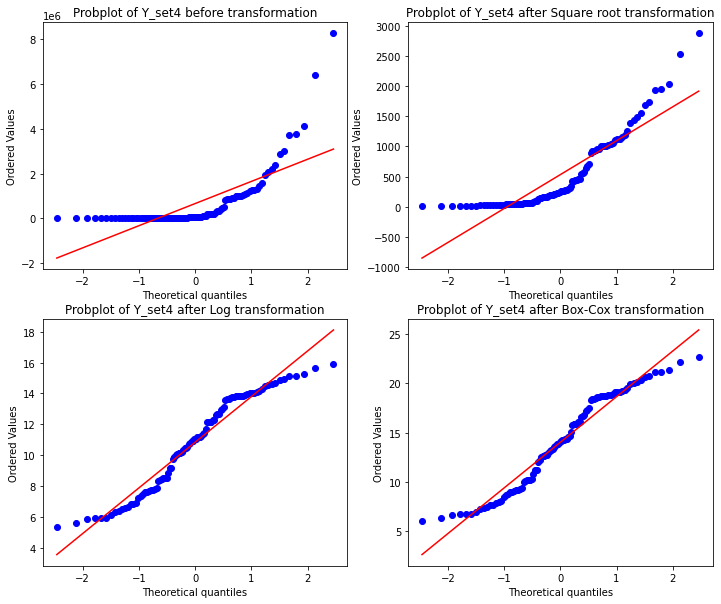

In [15]:
plt.figure(figsize=(12,10))

plt.subplot(221)
stats.probplot(x=df4.y, dist='norm', plot=plt)
plt.title('Probplot of Y_set4 before transformation')

plt.subplot(222)
stats.probplot(x=df4.Y_sqrt, dist='norm', plot=plt)
plt.title('Probplot of Y_set4 after Square root transformation')

plt.subplot(223)
stats.probplot(x=df4.Y_log, dist='norm', plot=plt)
plt.title('Probplot of Y_set4 after Log transformation')

plt.subplot(224)
stats.probplot(x=df4.Y_bc, dist='norm', plot=plt)
plt.title('Probplot of Y_set4 after Box-Cox transformation')

plt.show()

The log and the Box-Cox look very similar. Since the lambda=0.04 and therefore really close to 0, I believe the best transformation for df4 would be the **log**.

## e) Plot original vs transformed data

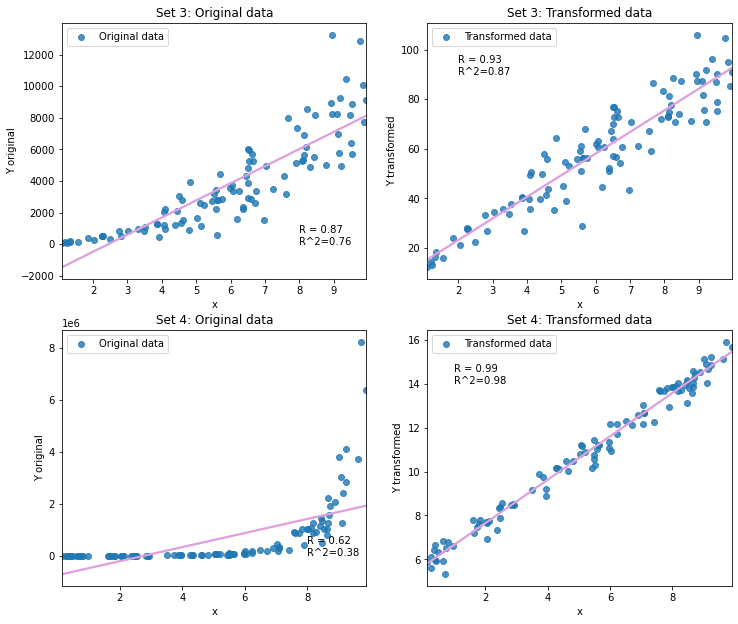

In [16]:
count=1
plt.subplots(figsize=(12, 16))

for set in df_all.keys():
    
    if set == 'Set 3' or set == 'Set 4':
        df = df_all[set]
        df.columns = df.columns.str.lower()
    
        # Plot the data
        plt.subplot(3,2,count)
        sns.regplot(x='x', y='y', data=df, label='Original data', ci=False, line_kws={'color':'plum'})
        
        # Add Pearson's values to the graph
        r, p = sp.stats.pearsonr(df.x, df.y)
        plt.annotate("R = {:.2f} \nR^2={:.2f}".format(r,r**2), (8, -10))

        plt.title('{}: Original data'.format(set))
        plt.ylabel('Y original')
        plt.legend(loc=2)
        
        count+=2
    else:
        pass

# Plot transformed data for set 3
plt.subplot(322)
sns.regplot(x='x', y='Y_bc', data=df3, label='Transformed data', ci=False, line_kws={'color':'plum'})

r, p = sp.stats.pearsonr(df3.x, df3.Y_bc)
plt.annotate("R = {:.2f} \nR^2={:.2f}".format(r,r**2), (2, 90))
plt.legend()
plt.ylabel('Y transformed')
plt.title('Set 3: Transformed data')

# Plot transformed data for set 4
plt.subplot(324)
sns.regplot(x='x', y='Y_log', data=df4, label='Transformed data', ci=False, line_kws={'color':'plum'})

r, p = sp.stats.pearsonr(df4.x, df4.Y_log)
plt.annotate("R = {:.2f} \nR^2={:.2f}".format(r,r**2), (1, 14))
plt.legend()
plt.ylabel('Y transformed')
plt.title('Set 4: Transformed data')

plt.show()     

**There are still potential outliers in set 3 but the linear relationship looks good for both data sets with transformed data an consequently the linearity assumption is now met for all data sets.**

# 5) Create linear regression model for all sets

## Model for df1

In [17]:
# With intercept
results_df1 = ols(formula='y ~ x', data=df1).fit()
results_df1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           4.47e-84
Time:                        22:25:40   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      0.469      0.508      0.613      -0.693       1.169
x              4.9843      0.074     67.669      0.000       4.838       5.130
==============================================================================
Omnibus:                        4.971   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.783
Skew:                          -0.536   Prob(JB):                       0.0915
Kurtosis:                       2.988   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Note: since the p-value for the intercept is >0.05, let's refit the model without the intercept**

### Original without intercept

In [18]:
# Without intercept
results_df1_ni = ols(formula='y ~ x + 0', data=df1).fit()
results_df1_ni.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.794e+04
Date:                Sun, 11 Jul 2021   Prob (F-statistic):                   3.31e-123
Time:                        22:25:40   Log-Likelihood:                         -206.17
No. Observations:                 100   AIC:                                      414.3
Df Residuals:                      99   BIC:                                      416.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              5.0184      0.030    167.166      0.000       4.959       5.078
==============================================================================
Omnibus:                        4.831   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                4.693
Skew:                          -0.530   Prob(JB):                       0.0957
Kurtosis:                       2.947   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model for df2

In [19]:
# With intercept
results_df2 = ols(formula='y ~ x', data=df2).fit()
results_df2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           6.11e-19
Time:                        22:25:40   Log-Likelihood:                -375.73
No. Observations:                 100   AIC:                             755.5
Df Residuals:                      98   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0956      2.547      0.430      0.668      -3.958       6.149
x              4.7774      0.432     11.062      0.000       3.920       5.634
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.079
Skew:                          -0.065   Prob(JB):                        0.961
Kurtosis:                       3.045   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Note: since the p-value for the intercept is >0.05, let's refit the model without the intercept**

### Original without intercept

In [20]:
# Without intercept
results_df2_ni = ols(formula='y ~ x + 0', data=df2).fit()
results_df2_ni.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              782.6
Date:                Sun, 11 Jul 2021   Prob (F-statistic):                    8.34e-49
Time:                        22:25:40   Log-Likelihood:                         -375.83
No. Observations:                 100   AIC:                                      753.7
Df Residuals:                      99   BIC:                                      756.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              4.9467      0.177     27.975      0.000       4.596       5.298
==============================================================================
Omnibus:                        0.202   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.904   Jarque-Bera (JB):                0.050
Skew:                          -0.052   Prob(JB):                        0.975
Kurtosis:                       3.030   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model for df3

**Original data**

In [21]:
# With intercept
results_df3_raw = ols(formula='y ~ x', data=df3).fit()
results_df3_raw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     302.4
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           1.04e-31
Time:                        22:25:40   Log-Likelihood:                -873.07
No. Observations:                 100   AIC:                             1750.
Df Residuals:                      98   BIC:                             1755.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2636.1748    402.741     -6.546      0.000   -3435.400   -1836.949
x           1081.8266     62.216     17.388      0.000     958.361    1205.292
==============================================================================
Omnibus:                       21.170   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.896
Skew:                           0.863   Prob(JB):                     5.90e-09
Kurtosis:                       5.474   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Transformed data (Box-Cox)

In [22]:
# With intercept
results_df3 = ols(formula='Y_bc ~ x', data=df3).fit()
results_df3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Y_bc   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     641.8
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           8.32e-45
Time:                        22:25:40   Log-Likelihood:                -353.39
No. Observations:                 100   AIC:                             710.8
Df Residuals:                      98   BIC:                             716.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7418      2.229      2.576      0.011       1.319      10.165
x              8.7229      0.344     25.333      0.000       8.040       9.406
==============================================================================
Omnibus:                        3.044   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.483
Skew:                          -0.254   Prob(JB):                        0.289
Kurtosis:                       3.582   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model for df4

**Original data**

In [23]:
# With intercept
results_df4_raw = ols(formula='y ~ x', data=df4).fit()
results_df4_raw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     59.97
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           8.87e-12
Time:                        22:25:40   Log-Likelihood:                -1526.2
No. Observations:                 100   AIC:                             3056.
Df Residuals:                      98   BIC:                             3062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.535e+05    2.1e+05     -3.585      0.001   -1.17e+06   -3.36e+05
x           2.707e+05   3.49e+04      7.744      0.000    2.01e+05     3.4e+05
==============================================================================
Omnibus:                      102.143   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.666
Skew:                           3.381   Prob(JB):                    5.89e-273
Kurtosis:                      18.973   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Transformed data (log)

In [24]:
# With intercept
results_df4 = ols(formula='Y_log ~ x', data=df4).fit()
results_df4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y_log   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5765.
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           6.91e-89
Time:                        22:25:40   Log-Likelihood:                -46.034
No. Observations:                 100   AIC:                             96.07
Df Residuals:                      98   BIC:                             101.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6647      0.078     72.264      0.000       5.509       5.820
x              0.9898      0.013     75.930      0.000       0.964       1.016
==============================================================================
Omnibus:                        7.020   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.256
Skew:                          -0.657   Prob(JB):                       0.0266
Kurtosis:                       2.872   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model for df5

In [25]:
# With intercept
results_df5 = ols(formula='y ~ x', data=df5).fit()
results_df5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     411.9
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           4.70e-37
Time:                        22:25:40   Log-Likelihood:                -334.42
No. Observations:                 101   AIC:                             672.8
Df Residuals:                      99   BIC:                             678.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9213      1.346      0.685      0.495      -1.749       3.591
x              4.7671      0.235     20.294      0.000       4.301       5.233
==============================================================================
Omnibus:                      113.783   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2578.951
Skew:                          -3.591   Prob(JB):                         0.00
Kurtosis:                      26.691   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Note: since the p-value for the intercept is >0.05, let's refit the model without the intercept**

### Original without intercept

In [26]:
results_df5_ni = ols(formula='y ~ x + 0', data=df5).fit()
results_df5_ni.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              1787.
Date:                Sun, 11 Jul 2021   Prob (F-statistic):                    1.33e-65
Time:                        22:25:40   Log-Likelihood:                         -334.65
No. Observations:                 101   AIC:                                      671.3
Df Residuals:                     100   BIC:                                      673.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              4.9068      0.116     42.273      0.000       4.676       5.137
==============================================================================
Omnibus:                      117.055   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.474
Skew:                          -3.721   Prob(JB):                         0.00
Kurtosis:                      28.039   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model for df6

In [27]:
# With intercept
results_df6 = ols(formula='y ~ x', data=df6).fit()
results_df6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           2.49e-54
Time:                        22:25:40   Log-Likelihood:                -367.52
No. Observations:                 101   AIC:                             739.0
Df Residuals:                      99   BIC:                             744.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3059      1.534     -0.199      0.842      -3.350       2.739
x              7.0272      0.218     32.259      0.000       6.595       7.459
==============================================================================
Omnibus:                        0.494   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.262
Skew:                           0.120   Prob(JB):                        0.877
Kurtosis:                       3.070   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Note: since the p-value for the intercept is >0.05, let's refit the model without the intercept**

### Original without intercept

In [28]:
results_df6_ni = ols(formula='y ~ x + 0', data=df6).fit()
results_df6_ni.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              2861.
Date:                Sun, 11 Jul 2021   Prob (F-statistic):                    2.17e-75
Time:                        22:25:40   Log-Likelihood:                         -367.54
No. Observations:                 101   AIC:                                      737.1
Df Residuals:                     100   BIC:                                      739.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              6.9926      0.131     53.488      0.000       6.733       7.252
==============================================================================
Omnibus:                        0.469   Durbin-Watson:                   2.256
Prob(Omnibus):                  0.791   Jarque-Bera (JB):                0.244
Skew:                           0.116   Prob(JB):                        0.885
Kurtosis:                       3.067   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 6) Evaluate the linear model

## a) Dealing with potential outliers

In order to identify potential outliers, let's look at the infulence plot and also calculate the p-value of the difference in coefficients before and after outliers removal.

### (i) Influence plots

**Note: Influence plot helps to visually spot outliers.**

- Leverage
        - should be < $\frac{3 \times k}{n}$ where k = number of parameters in the model
        - can be detected visually with the influence plot
        - can be calculated using hat_matrix_diag
- Studentized residuals:
        - should be < 3 or > -3
        - can be detected visually with the influence plot
        - can be calculated using resid_studentized_internal

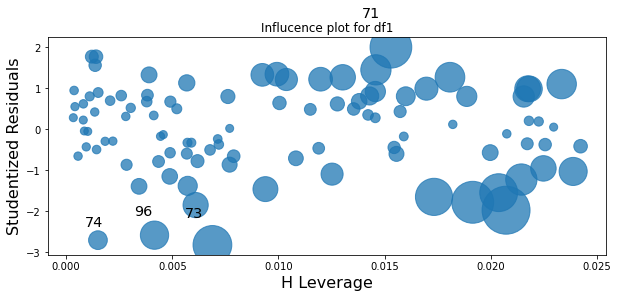

Maximum leverage point in this model is 0.024000 which is lower than 3*k/n (0.06).
Maximum residual point in this model is 1.968159 which is <3.
Minimum residual point in this model is -2.728668 which is >-3.


In [29]:
# df1

#Plot influcence plot
fig, ax = plt.subplots(figsize=(10,4))
fig = influence_plot(results=results_df1_ni, ax=ax, criterion='Cooks')
plt.title('Influcence plot for df1')
plt.show()

# Calculate leverage
k = 2
n = 101
influence1 = results_df1_ni.get_influence()
leverage1 = influence1.hat_matrix_diag
print('Maximum leverage point in this model is %f which is lower than 3*k/n (0.06).' %round(leverage1.max(), 3))

# Calculate residuals
residuals1 = influence1.resid_studentized_internal
print('Maximum residual point in this model is %f which is <3.' %residuals1.max())
print('Minimum residual point in this model is %f which is >-3.' %residuals1.min())

- Studentized residuals are between -3 and 3
- Leverage is < 0.06
- No outliers in df1

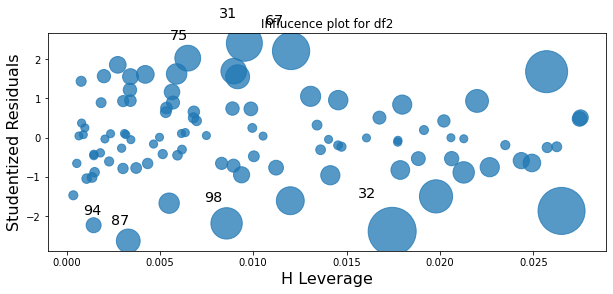

Maximum leverage point in this model is 0.028000 which is lower than 3*k/n (0.06).
Maximum residual point in this model is 2.350669 which is <3.
Minimum residual point in this model is -2.556293 which is >-3.


In [30]:
# df2

#Plot influcence plot
fig, ax = plt.subplots(figsize=(10,4))
fig = influence_plot(results=results_df2_ni, ax=ax, criterion='Cooks')
plt.title('Influcence plot for df2')
plt.show()

# Calculate leverage
k = 2
n = 101
influence2 = results_df2_ni.get_influence()
leverage2 = influence2.hat_matrix_diag
print('Maximum leverage point in this model is %f which is lower than 3*k/n (0.06).' %round(leverage2.max(), 3))

# Calculate residuals
residuals2 = influence2.resid_studentized_internal
print('Maximum residual point in this model is %f which is <3.' %residuals2.max())
print('Minimum residual point in this model is %f which is >-3.' %residuals2.min())

- Studentized residuals are between -3 and 3
- Leverage is < 0.06
- No outliers in df2

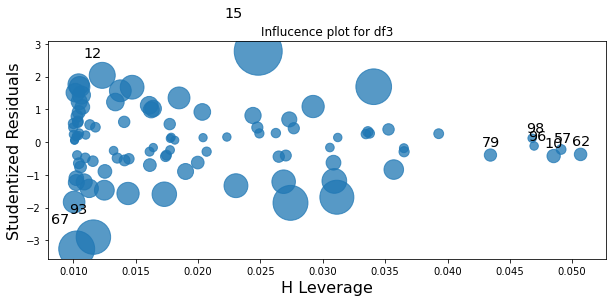

Maximum leverage point in this model is 0.051000 which is lower than 3*k/n (0.06).
Maximum residual point in this model is 2.682812 which is <3.
Minimum residual point in this model is -3.112070 which is <-3 and is therefore considered an outlier.


In [31]:
# df3

# Plot influence plot
fig, ax = plt.subplots(figsize=(10,4))
fig = influence_plot(results=results_df3, ax=ax, criterion='Cooks')
plt.title('Influcence plot for df3')
plt.show()

# Calculate leverage
k = 2
n = 101
influence3 = results_df3.get_influence()
leverage3 = influence3.hat_matrix_diag
print('Maximum leverage point in this model is %f which is lower than 3*k/n (0.06).' %round(leverage3.max(), 3))

# Calculate residuals
residuals3 = influence3.resid_studentized_internal
print('Maximum residual point in this model is %f which is <3.' %residuals3.max())
print('Minimum residual point in this model is %f which is <-3 and is therefore considered an outlier.' %residuals3.min())

- The majority of studentized residuals are between -3 and 3
- Leverage is < 0.06
- Outliers with point# 67; should be removed and compare the new model without this observation

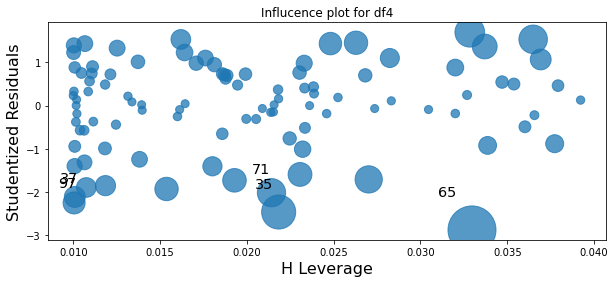

Maximum leverage point in this model is 0.039000 which is lower than 3*k/n (0.06).
Maximum residual point in this model is 1.681084 which is <3.
Minimum residual point in this model is -2.777137 which is >-3.


In [32]:
# df4

# Plot influcence plot
fig, ax = plt.subplots(figsize=(10,4))
fig = influence_plot(results=results_df4, ax=ax, criterion='Cooks')
plt.title('Influcence plot for df4')
plt.show()

# Calculate leverage
k = 2
n = 101
influence4 = results_df4.get_influence()
leverage4 = influence4.hat_matrix_diag
print('Maximum leverage point in this model is %f which is lower than 3*k/n (0.06).' %round(leverage4.max(), 3))

# Calculate residuals
residuals4 = influence4.resid_studentized_internal
print('Maximum residual point in this model is %f which is <3.' %residuals4.max())
print('Minimum residual point in this model is %f which is >-3.' %residuals4.min())

- Studentized residuals are between -3 and 3
- Leverage is < 0.06
- No outliers in df4 transformed

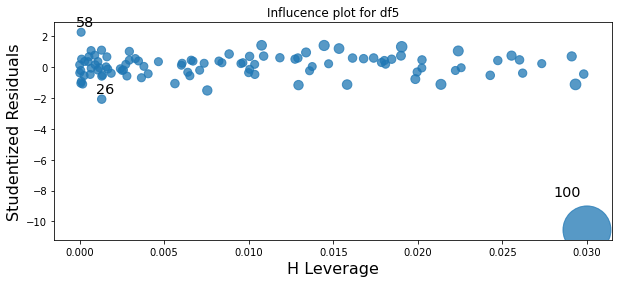

Maximum leverage point in this model is 0.030000 which is lower than 3*k/n (0.06).
Maximum residual point in this model is 2.227073 which is <3.
Minimum residual point in this model is -7.277129 which is <-3 and is therefore considered an outlier.


In [33]:
# df5

#Plot influence plot
fig, ax = plt.subplots(figsize=(10,4))
fig = influence_plot(results=results_df5_ni, ax=ax)
plt.title('Influcence plot for df5')
plt.show()

# Calculate leverage
k = 2
n = 100
influence5 = results_df5_ni.get_influence()
leverage5 = influence5.hat_matrix_diag
print('Maximum leverage point in this model is %f which is lower than 3*k/n (0.06).' %round(leverage5.max(), 3))

# Calculate residuals
residuals5 = influence5.resid_studentized_internal
print('Maximum residual point in this model is %f which is <3.' %residuals5.max())
print('Minimum residual point in this model is %f which is <-3 and is therefore considered an outlier.' %residuals5.min())

- The majority of studentized residuals are between -3 and 3
- Leverage is < 0.06
- Outliers with point# 100; should be removed and compare the new model without this observation

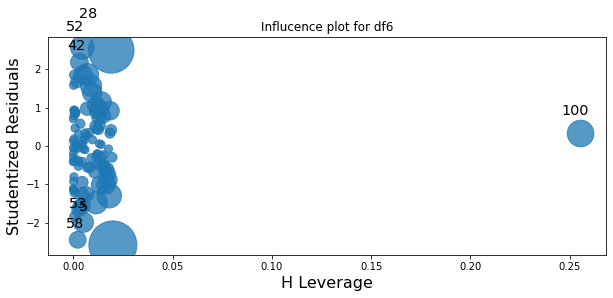

Maximum leverage point in this model is 0.256000 which is higher than 3*k/n (0.06) and is therefore considered an outlier.
Maximum residual point in this model is 2.508146 which is <3.
Minimum residual point in this model is -2.511998 which is >-3 .


In [34]:
# df6

# Plot influence plot
fig, ax = plt.subplots(figsize=(10,4))
fig = influence_plot(results=results_df6_ni, ax=ax)
plt.title('Influcence plot for df6')
plt.show()

# Calculate leverage
k = 2
n = 100
influence6 = results_df6_ni.get_influence()
leverage6 = influence6.hat_matrix_diag
print('Maximum leverage point in this model is %f which is higher than 3*k/n (0.06) and is therefore considered an outlier.' %round(leverage6.max(), 3))

# Calculate residuals
residuals6 = influence6.resid_studentized_internal
print('Maximum residual point in this model is %f which is <3.' %residuals6.max())
print('Minimum residual point in this model is %f which is >-3 .' %residuals6.min())

- Studentized residuals are between -3 and 3
- Leverage for the majority of points is < 0.06
- Outliers with point# 100; should be removed and compare the new model without this observation

### (ii) Remove potential outliers

To be removed:
- row#67 in df3
- row#100 in df5
- row#100 in df6

In [35]:
# Locate outliers
df3.iloc[67,:]
df5.iloc[100,:]
df6.iloc[100,:]

y    252.837897
x     35.783400
Name: 100, dtype: float64

In [36]:
# Remove outliers
df3b = df3.drop(67)
df5b = df5.drop(100)
df6b = df6.drop(100)

In [37]:
df3b.shape

(99, 5)

#### >> Model 3 without the outlier

In [38]:
# Create new model 3 without the outlier

results_df3b = ols(formula='Y_bc ~ x', data=df3b).fit()
results_df3b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Y_bc   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     701.8
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           3.35e-46
Time:                        22:25:43   Log-Likelihood:                -345.20
No. Observations:                  99   AIC:                             694.4
Df Residuals:                      97   BIC:                             699.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1103      2.130      2.869      0.005       1.883      10.337
x              8.7051      0.329     26.492      0.000       8.053       9.357
==============================================================================
Omnibus:                        0.549   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.760   Jarque-Bera (JB):                0.181
Skew:                          -0.032   Prob(JB):                        0.914
Kurtosis:                       3.199   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### >> Model 5 without the outlier

In [39]:
# Create new model 5 without the intercept and without the outlier

results_df5b_ni = ols(formula='y ~ x + 0', data=df5b).fit()
results_df5b_ni.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              3872.
Date:                Sun, 11 Jul 2021   Prob (F-statistic):                    3.52e-81
Time:                        22:25:43   Log-Likelihood:                         -294.13
No. Observations:                 100   AIC:                                      590.3
Df Residuals:                      99   BIC:                                      592.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              5.0553      0.081     62.225      0.000       4.894       5.217
==============================================================================
Omnibus:                        2.985   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.694
Skew:                          -0.162   Prob(JB):                        0.260
Kurtosis:                       3.736   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### >> Model 6 without the outlier

In [40]:
# Create new model 6 without the intercept and without the outlier

results_df6b_ni = ols(formula='y ~ x + 0', data=df6b).fit()
results_df6b_ni.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              2096.
Date:                Sun, 11 Jul 2021   Prob (F-statistic):                    1.99e-68
Time:                        22:25:43   Log-Likelihood:                         -364.34
No. Observations:                 100   AIC:                                      730.7
Df Residuals:                      99   BIC:                                      733.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              6.9674      0.152     45.779      0.000       6.665       7.269
==============================================================================
Omnibus:                        0.458   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.261
Skew:                           0.123   Prob(JB):                        0.878
Kurtosis:                       3.044   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (iii) Calculate p-value for the difference in coefficients between models

**Note: before removing the outliers permanently, we should compare coefficients before and after outlier(s) removal to check if the outliers are influential or not (strongly influcence the fit or not).**

Hypothesis:

$H_0$: the difference in coefficient values is zero: |coef(a) - coef(b)| = 0

$H_a$: the difference is non-zero

In [41]:
# Calculate the difference in coefficients 

slope3a = results_df3.params[1] # Intercept [0], slope [1]
slope3b = results_df3b.params[1]
diff_df3 = abs(slope3a - slope3b)

slope5a = results_df5_ni.params[0] # No intercept, only slope [0]
slope5b = results_df5b_ni.params[0]
diff_df5 = abs(slope5a - slope5b)

slope6a = results_df6_ni.params[0]
slope6b = results_df6b_ni.params[0]
diff_df6 = abs(slope6a - slope6b)

print(diff_df3)
print(diff_df5)
print(diff_df6)

0.01776718527105281
0.14854408485652115
0.02513281484174268


In [42]:
# Calculate SE pooled
SE3a = 0.344
SE3b = 0.336
SE5a = 0.116
SE5b = 0.081 
SE6a = 0.131
SE6b = 0.152  

SE_df3 = sqrt(SE3a**2 + SE3b**2)
SE_df5 = sqrt(SE5a**2 + SE5b**2)
SE_df6 = sqrt(SE6a**2 + SE6b**2)

print(SE_df3)
print(SE_df5)
print(SE_df6)

0.480865885668759
0.14148144754701938
0.20066140635408694


In [64]:
# Calculate p-value (two-tailed) with mean_H0 set at 0 (no difference in coefficients) and mean_Ha = diff_df(i)
pval_df3 = 2*(1-stats.norm.cdf(x=diff_df3, loc=0, scale=SE_df3))
pval_df5 = 2*(1-stats.norm.cdf(x=diff_df5, loc=0, scale=SE_df5))
pval_df6 = 2*(1-stats.norm.cdf(x=diff_df6, loc=0, scale=SE_df6))

print('p-value for df3 = ', pval_df3)
print('p-value for df5 = ', pval_df5)
print('p-value for df6 = ', pval_df6)

p-value for df3 =  0.9705262144777713
p-value for df5 =  0.29375527422370173
p-value for df6 =  0.9003257383659369


### (iv) Decision for outliers

| Set 3 | Before | After |
| --- | --- | --- |
| Coefficient | 8.7229 | 8.7051 |
| Conf. Interval | [8.040 - 9.406] | [8.053 - 9.357] |
| R2 | 0.868 | 0.879 |

| Set 5 | Before | After |
| --- | --- | --- |
| Coefficient | 4.9068 | 5.0553 |
| Conf. Interval | [4.676 - 5.137] | [4.894 - 5.217] |
| R2 | 0.947 | 0.975 |

| Set 6 | Before | After |
| --- | --- | --- |
| Coefficient | 6.9926 | 6.9674 |
| Conf. Interval | [6.733 - 7.252] | [6.665 - 7.269] |
| R2 | 0.966 | 0.955 |


 
a) The coefficients are all similar after removal as compared to before. Same with the confidence intervals and $R^2$.

b) All p-values are > 0.05 and therefore cannot reject the $H_0$ stating that there is no difference in coefficient values before and after outlier removal.

**The conclusion is that the change in the coefficient value from before and after removing the outlier is not statistically significant and there is no need to remove outliers from any dataset because they don't seem to be influential on the coefficients.**

## b) Examination of regression residuals

- The residuals of a valid regression model must be **nearly normally distributed and centered close to 0.** 
- Failure to meet this requirement may indicate a misspecified model &mdash; i.e. the given explanatory variable is not sufficient to estimate $y$, or may indicate the presence of influential points.
- If the mean is not 0, the model is biased.

### (i) Calculate the residuals for each data set

In [44]:
# Calculate the estimates of y using the model created

df1['y_pred'] = results_df1_ni.predict(df1)
df2['y_pred'] = results_df2_ni.predict(df2)
df3['y_pred'] = results_df3.predict(df3)
df4['y_pred'] = results_df4.predict(df4)
df5['y_pred'] = results_df5_ni.predict(df5)
df6['y_pred'] = results_df6_ni.predict(df6)

In [45]:
# Calculate the mean of the residuals 
df1['Residuals'] = df1.y_pred - df1.y
df2['Residuals'] = df2.y_pred - df2.y
df3['Residuals'] = df3.y_pred - df3.Y_bc
df4['Residuals'] = df4.y_pred - df4.Y_log
df5['Residuals'] = df5.y_pred - df5.y
df6['Residuals'] = df6.y_pred - df6.y

print(df1['Residuals'].mean())
print(df2['Residuals'].mean())
print(df3['Residuals'].mean())
print(df4['Residuals'].mean())
print(df5['Residuals'].mean())
print(df6['Residuals'].mean())

-0.03984605854906311
-0.18517663643944662
-1.8260948309034574e-14
-1.616484723854228e-15
-0.22615744311367159
0.11124201331257907


**Note: the mean of the residuals are close to zero suggesting that the models seem to be valid.**

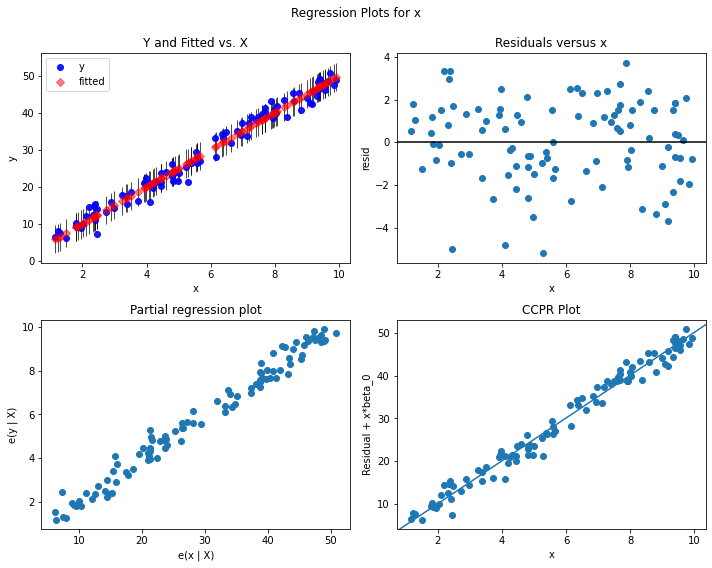

In [46]:
# Plot the residuals for Y1
figure = plt.figure(figsize=(10,8))
fig = plot_regress_exog(results=results_df1_ni, exog_idx='x', fig=figure)

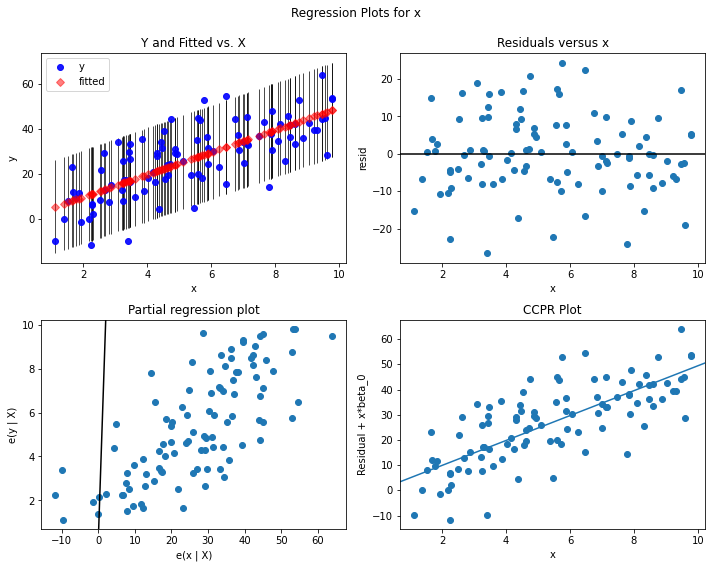

In [47]:
# Plot the residuals for Y2
figure = plt.figure(figsize=(10,8))
fig = plot_regress_exog(results=results_df2_ni, exog_idx='x', fig=figure)

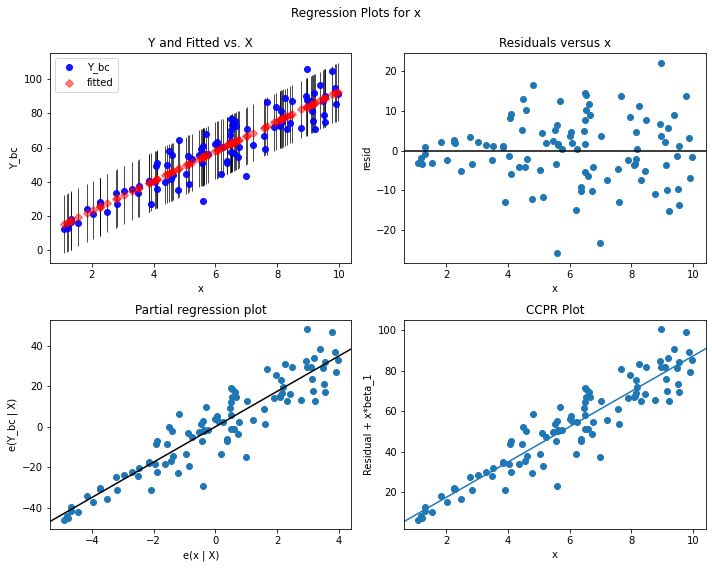

In [48]:
# Plot the residuals for Y3
figure = plt.figure(figsize=(10,8))
fig = plot_regress_exog(results=results_df3, exog_idx='x', fig=figure)

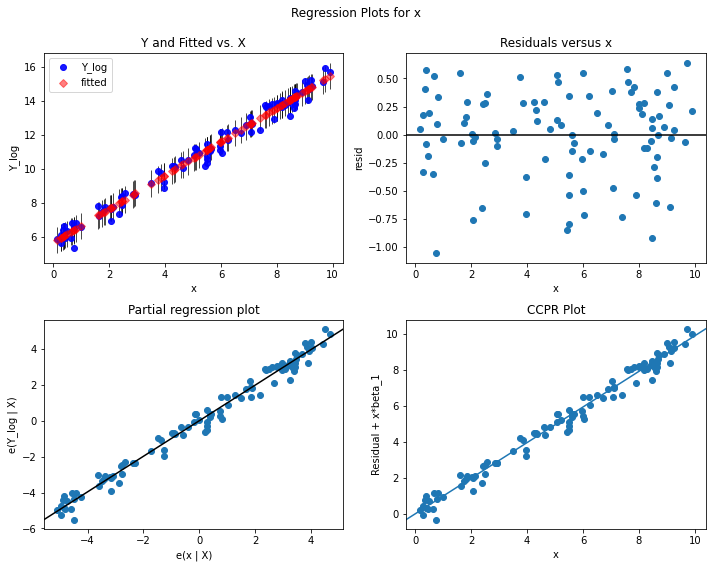

In [49]:
# Plot the residuals for Y4
figure = plt.figure(figsize=(10,8))
fig = plot_regress_exog(results=results_df4, exog_idx='x', fig=figure)

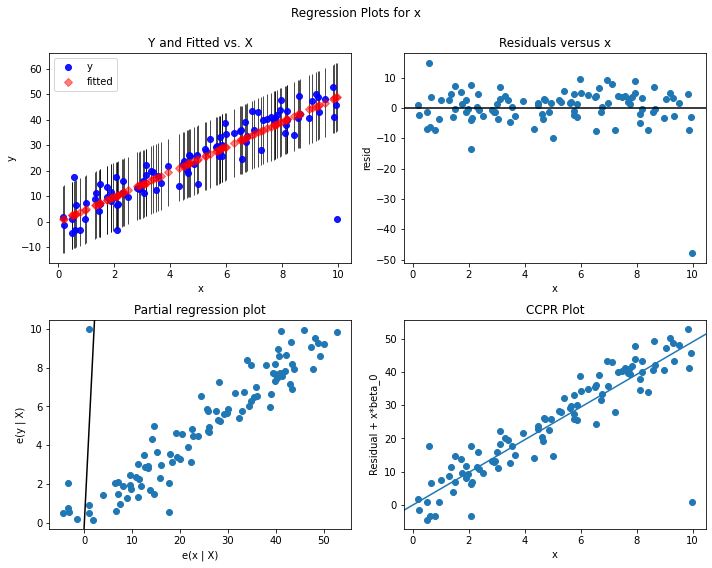

In [50]:
# Plot the residuals for Y5
figure = plt.figure(figsize=(10,8))
fig = plot_regress_exog(results=results_df5_ni, exog_idx='x', fig=figure)

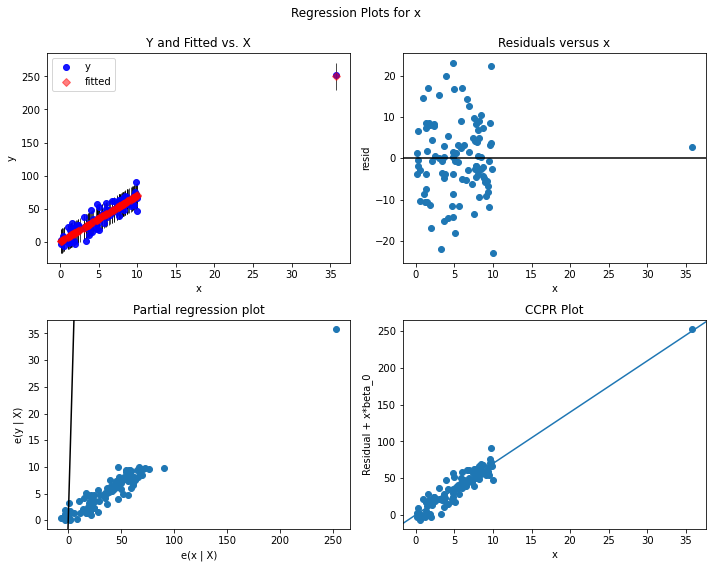

In [51]:
# Plot the residuals for Y6
figure = plt.figure(figsize=(10,8))
fig = plot_regress_exog(results=results_df6_ni, exog_idx='x', fig=figure)

### (ii) Create normal probability plot of residuals for each data set

- One way to examine the model's residuals is the **normal probability plot** indicating high positive correlation. 
    - All the points on the plot should lie on the identity line
    - Deviations from the identify line suggest departures form normality
- Another common way to assess a regression model is to calculate the **coefficient of determination $R^2$** between the estimates $\widehat{y}$ and the actual observations $y$.
    - The $R^2$ provides a measure of how well the observed values are replicated by the regression model
    - $R^2 = 0$ indicates that there is no linear relationship between the model estimates and the observed values, while $R^2 = 1$ indicates that the model provides a perfect fit to the observed values

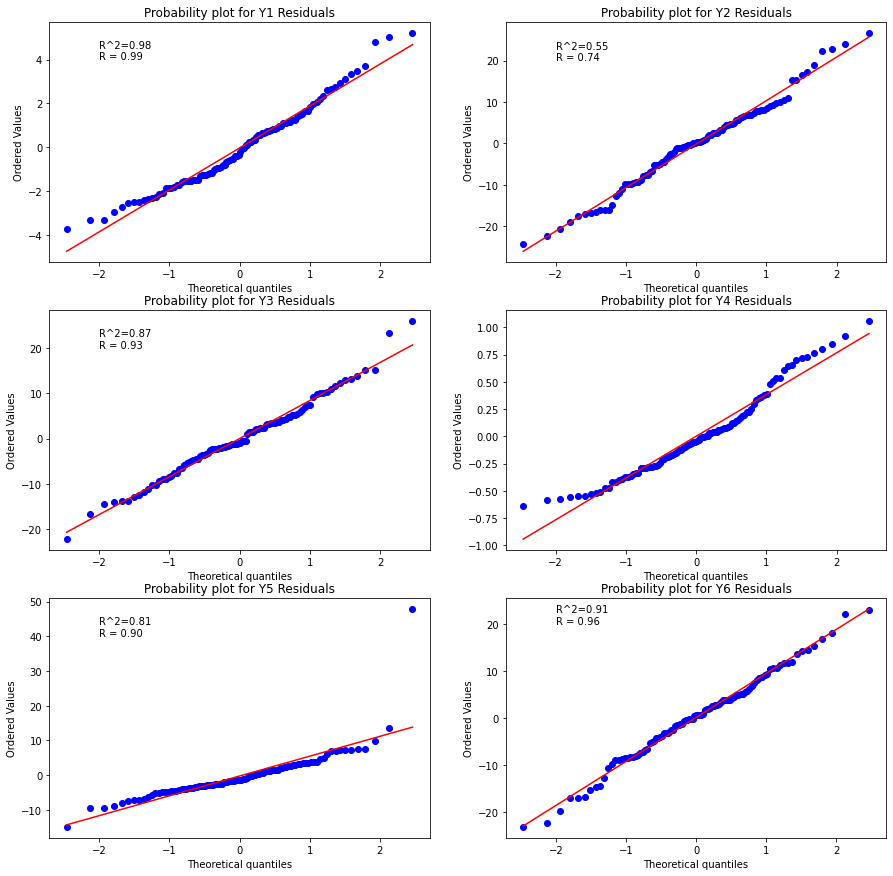

In [52]:
plt.figure(figsize=(15,15))

plt.subplot(321)
stats.probplot(x=df1.Residuals, dist='norm', plot=plt)
r2 = r2_score(y_true=df1.y, y_pred=df1.y_pred)
plt.annotate("R^2={:.2f} \nR = {:.2f}".format(r2,sqrt(r2)), (-2,4))
plt.title('Probability plot for Y1 Residuals')

plt.subplot(322)
stats.probplot(x=df2.Residuals, dist='norm', plot=plt)
r2 = r2_score(y_true=df2.y, y_pred=df2.y_pred)
plt.annotate("R^2={:.2f} \nR = {:.2f}".format(r2,sqrt(r2)), (-2,20))
plt.title('Probability plot for Y2 Residuals')

plt.subplot(323)
stats.probplot(x=df3.Residuals, dist='norm', plot=plt)
r2 = r2_score(y_true=df3.Y_bc, y_pred=df3.y_pred)
plt.annotate("R^2={:.2f} \nR = {:.2f}".format(r2,sqrt(r2)), (-2,20))
plt.title('Probability plot for Y3 Residuals')

plt.subplot(324)
stats.probplot(x=df4.Residuals, dist='norm', plot=plt)
r2 = r2_score(y_true=df4.Y_log, y_pred=df4.y_pred)
plt.annotate("R^2={:.2f} \nR = {:.2f}".format(r2,sqrt(r2)), (-2,1.5))
plt.title('Probability plot for Y4 Residuals')

plt.subplot(325)
stats.probplot(x=df5.Residuals, dist='norm', plot=plt)
r2 = r2_score(y_true=df5.y, y_pred=df5.y_pred)
plt.annotate("R^2={:.2f} \nR = {:.2f}".format(r2,sqrt(r2)), (-2,40))
plt.title('Probability plot for Y5 Residuals')

plt.subplot(326)
stats.probplot(x=df6.Residuals, dist='norm', plot=plt)
r2 = r2_score(y_true=df6.y, y_pred=df6.y_pred)
plt.annotate("R^2={:.2f} \nR = {:.2f}".format(r2,sqrt(r2)), (-2,20))
plt.title('Probability plot for Y6 Residuals')

plt.show()

**Note: we don't see any deviations in residuals from the identify line suggesting no departures form normality.**

### (iii) Check for skewness and kurtosis of residuals

- The normal distribution has a skewness of 0 and a kurtosis of 3.
- If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
- If skewness is less than -1 or greater than 1, the distribution is highly skewed.

In [53]:
df1.agg(['skew', 'kurtosis'])[['Residuals']].transpose()

skew  kurtosis
Residuals  0.5381   0.00643

In [54]:
df2.agg(['skew', 'kurtosis'])[['Residuals']].transpose()

skew  kurtosis
Residuals  0.053255  0.094182

In [55]:
df3.agg(['skew', 'kurtosis'])[['Residuals']].transpose()

skew  kurtosis
Residuals  0.257431  0.674692

In [56]:
df4.agg(['skew', 'kurtosis'])[['Residuals']].transpose()

skew  kurtosis
Residuals  0.666726 -0.072595

In [57]:
df5.agg(['skew', 'kurtosis'])[['Residuals']].transpose()

skew   kurtosis
Residuals  3.777111  26.386128

In [58]:
df6.agg(['skew', 'kurtosis'])[['Residuals']].transpose()

skew  kurtosis
Residuals -0.117392   0.13248

### (iv) Final decision for outliers

- There is a problem with the skewness and kurtosis of the residuals for df5 and consequently violate one of the assumptions for linear regression making the model for set 5 not valid although it shows a strong positive linear correlations. The skew is most likely due to the outlier because all other data points are centered around 0 with constant variability.
- By looking visually at the data set 5, I believe that one outlier is not representative of the overall response Y with high values of x. 
- It was previously determined that the change in the coefficient value from before and after removing the outlier was not statistically significant (p-value = 0.29) meaning that the decision to remove or to keep the outlier does not make much of a difference in the coefficient. However, keeping the outlier in the data set has the negative consequence of making the distribution not normal with sknewness and kurtosis outside acceptable range to be distributed normally.
- Therefore, since the coefficient is not statistically different if we remove the outlier or not but removing the outlier has the major advantage to make the data set distributed near normal, the better decision in this particular case is to remove the outlier for set 5.
- By removing the outlier in set 5, the new model no longer violate any assumption for linear regression and is therefore valid along with keeping the coefficient similar to the other model. 

- The decision to keep the outliers in data set 3 and 6 remains unchanged.

### (v) New residuals for df5 (without outlier)

In [59]:
# Re-calculate the estimates of y using the model without outlier
df5b['y_pred'] = results_df5b_ni.predict(df5b)

# Re-calculate the mean of the residuals 
df5b['Residuals'] = df5b.y_pred - df5b.y

print('The mean of the residuals for set 5 including the outlier is =',df5['Residuals'].mean())
print('The mean of the residuals for set 5 excluding the outlier is =',df5b['Residuals'].mean())

The mean of the residuals for set 5 including the outlier is = -0.22615744311367159
The mean of the residuals for set 5 excluding the outlier is = 0.024349920843168046


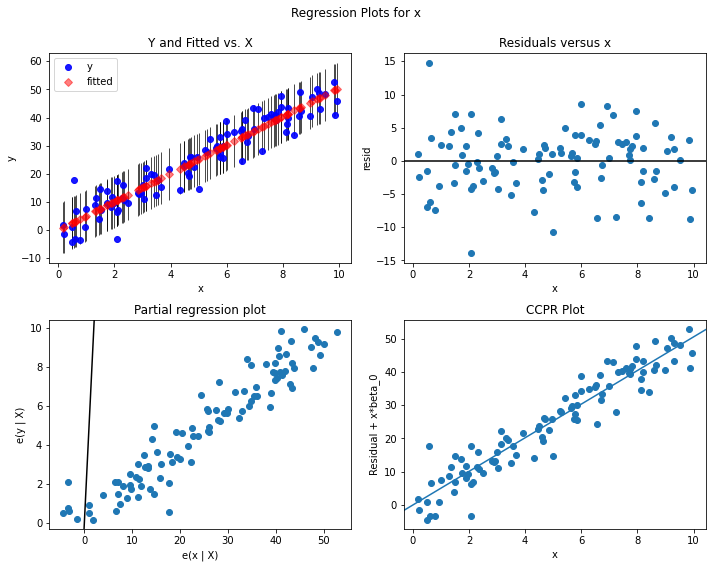

In [60]:
# Plot the residuals for Y5 (without outlier)
figure = plt.figure(figsize=(10,8))
fig = plot_regress_exog(results=results_df5b_ni, exog_idx='x', fig=figure)

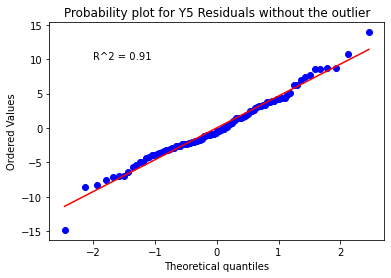

In [61]:
# Normal probability plot of residuals (without outlier)
stats.probplot(x=df5b.Residuals, dist='norm', plot=plt)
r2 = r2_score(y_true=df5b.y, y_pred=df5b.y_pred)
plt.annotate("R^2 = {:.2f}".format(r2), (-2, 10))
plt.title('Probability plot for Y5 Residuals without the outlier')
plt.show()

In [62]:
# Re-check for skewness and kurtosis
df5b.agg(['skew', 'kurtosis'])[['Residuals']].transpose()

skew  kurtosis
Residuals  0.164595  0.836529

Notes:
    
- The mean of the residuals without the outlier is much closer to zero, suggesting close to normal distribution
- The $R^2$ for the residuals without the outlier improved as compared to the value keeping the outlier, suggesting a better fit
- Skewness and kurtosis vastly improved by removing the outlier and the model is now valid

| Set 5 | Before | After |
| --- | --- | --- |
| Skewness | 3.777111 | 0.164595 |
| Kurtosis | 26.386128 | 0.836529 |
| R2 | 0.81 | 0.91 |

# Linear regression assumptions and validity

**Linearity**
- The original data from set 3 and set 4 are not linearly correlated. Nevertheless, by using the Box-Cox and log transformations, the data show linearity.
- As a result, this assumption is met for all data sets.


**Normal distribution of residuals**
- The distribution of residuals (using transformed data for set 3 and set 4) is approximately symmetric and the mean of the residuals is close to zero for all data sets.
- We don't see any deviations in residuals from the identify line on the normal probability plot suggesting no departures form normality.
- Skewness and kurtosis are within normal range for all data sets.
- We can then assume normality of residuals for all data sets.
- As a result, this assumption is met for all data sets.

**Constant variance of residuals**
- From the residuals plot versus X, we can see that residuals are spread evenly on each side of the mean, showing constant variance of residuals for all sets with no periodicity.
- As a result, this assumption is met for all data sets.

**No auto-correlation**
- Values from the Durbin-Watson test are between 1.2 and 2.8 for all data sets suggesting no auto-correlation between variables.
- As a result, this assumption is met for all data sets.

**Validity**
- Using original data for set 1, set 2, set 5,and set 6 and transformed data for set 3 and set 4, all chosen models seem to be valid and suffer only from very little bias.

# Interpretation of the models

**Notes**

As suggested by Dr. Nokhrin, only coefficients from model using original data are interpreted.

In [63]:
# Calculate the  geometric mean by back-transforming the transformed data
y_inv_df3x = inv_boxcox(results_df3.params[1], lmbda1) # slope x
y_inv_df3i = inv_boxcox(results_df3.params[0], lmbda1) # intercept
y_inv_df4x = math.exp(results_df4.params[1])
y_inv_df4i = math.exp(results_df4.params[0])

print('The geometric mean of X for df3 is', y_inv_df3x)
print('The geometric mean of the intercept for df3 is', y_inv_df3i)
print('The geometric mean of X for df4 is', y_inv_df4x)
print('The geometric mean of the intercept for df4 is', y_inv_df4i)

The geometric mean of X for df3 is 43.41529473915252
The geometric mean of the intercept for df3 is 19.95972874626089
The geometric mean of X for df4 is 2.690825971713496
The geometric mean of the intercept for df4 is 288.5076959208399


**Model Set 1:**

    - y = 5.0184x
    - Indicates that for every additional unit increase in X, the average Y increases by about 5.0 units.

**Model Set 2:**
    
    - y = 4.9467x
    - Indicates that for every additional unit increase in X, the average Y increases by about 4.9 units.  
    
**Model Set 3:**
    
    - bc(y) = 5.7418 + 8.7229x
    - Intercept coefficient = 5.7418
    - Geometric mean of the intercept = 20.0
    - Coefficient for x = 8.7229
    - Geometric mean of x = 43.4
    
**Model Set 4:**
    
    - log(y) = 5.6647 + 0.9898x
    - Intercept coefficient = 5.6647
    - Geometric mean of the intercept = 288
    - Coefficient for x = 0.9898
    - Geometric mean of x = 2.69
       
**Model Set 5:**
    
    - y = 5.0553x
    - Indicates that for every additional unit increase in X, the average Y increases by about 5.1 units.
    
**Model Set 6:**
    
    - y = 6.9926x
    - Indicates that for every additional unit increase in X, the average Y increases by about 7.0 units.